In [21]:
from SQLite_handler import *
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.2)

## Check distripution and time-series

In [11]:
def get_pred_from_file(in_name):
    rst = []
    for line in tqdm(open(in_name)):
        w = line.strip().split(",")
        # dt = w[1][: 10]
        d = float(w[2])
        if d < 0:
            continue
        rst.append({"uid": w[0], "dt": w[1], "prob": d})
    rst = pd.DataFrame(rst)
    rst.dt = pd.to_datetime(rst.dt)
    return rst

In [12]:
rst = get_pred_from_file("disk/data/predicted-tweets-201902~10.txt")

Text(0.5, 1.0, 'Probability of tweets support MP')

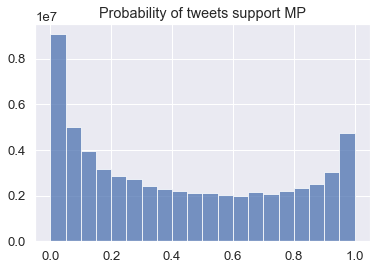

In [93]:
rst.prob.hist(bins=20, alpha=0.75)
plt.title("Probability of tweets support MP")

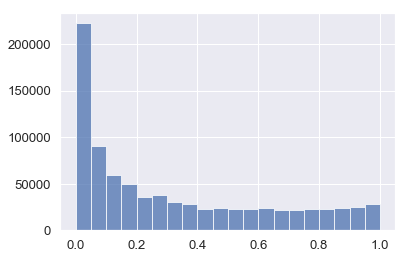

In [94]:
rst_tmp = rst[(rst.dt >= "2019-02-01") & (rst.dt < "2019-03-01")]
rst_tmp.prob.hist(bins=20, alpha=0.75)

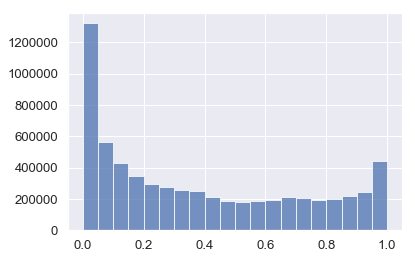

In [95]:
rst_tmp = rst[(rst.dt >= "2019-03-01") & (rst.dt < "2019-04-01")]
rst_tmp.prob.hist(bins=20, alpha=0.75)

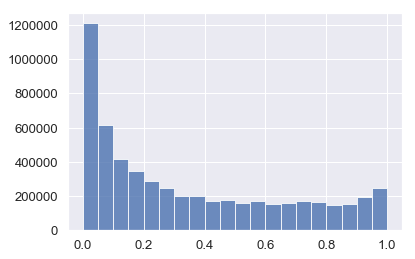

In [15]:
rst_tmp = rst[(rst.dt >= "2019-04-01") & (rst.dt < "2019-05-01")]
rst_tmp.prob.hist(bins=20, alpha=0.8)

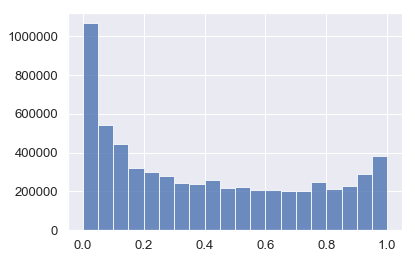

In [16]:
rst_tmp = rst[(rst.dt >= "2019-05-01") & (rst.dt < "2019-06-01")]
rst_tmp.prob.hist(bins=20, alpha=0.8)

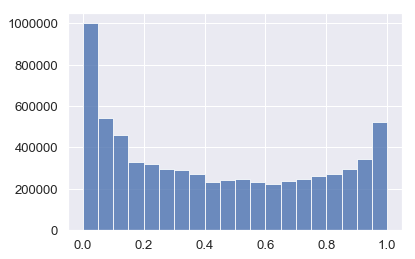

In [17]:
rst_tmp = rst[(rst.dt >= "2019-06-01") & (rst.dt < "2019-07-01")]
rst_tmp.prob.hist(bins=20, alpha=0.8)

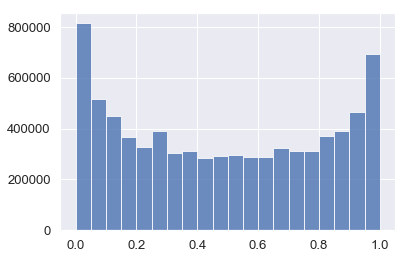

In [18]:
rst_tmp = rst[(rst.dt >= "2019-07-01") & (rst.dt < "2019-08-01")]
rst_tmp.prob.hist(bins=20, alpha=0.8)

In [19]:
len(rst[rst.prob == 0]), len(rst[rst.prob == 1])

(982680, 1085450)

In [20]:
len(rst[rst.prob > 0.5]) / len(rst), len(rst[rst.prob > 0.75]) / (len(rst[rst.prob > 0.75]) + len(rst[rst.prob <= 0.25]))

(0.412491610745123, 0.3808172691966067)

In [88]:
def plot_ts(in_name, title=None):
#     page_data = pd.read_csv("web/data/2019-06/p1.csv")

# #     for i, row in page_data.iterrows():
# #         page_data.loc[i, "dt"] = pendulum.parse(page_data.loc[i, "dt"]).add(days=-1).to_date_string()
    
#     page_data = page_data.set_index("dt")
#     page_data = page_data[page_data.index > "2019-07-13"]
#     page_data.index = pd.to_datetime(page_data.index)
#     page_data = page_data[["Fernandez (AI)", "Macri (AI)"]]
#     page_data = page_data.dropna(how="any")
#     plt.plot_date(page_data.index, page_data["Fernandez (AI)"], "-", label="Fernandez (AI)")
#     plt.plot_date(page_data.index, page_data["Macri (AI)"], "-", label="Macri (AI)")
    
    data = pd.read_csv("disk/data/" + in_name).set_index("dt")
    data = data[data.index >= "2019-03-01"]
    data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    data.U_I = data["U"] + data["I"]

#     data["Kp"] = data["K"] / (data["K"] + data["M"])
#     data["Mp"] = data["M"] / (data["K"] + data["M"])
    
    data["Kp"] = data["K"] / (data["K"] + data["M"] + data["U"] + data["I"]) * 100
    data["Mp"] = data["M"] / (data["K"] + data["M"] + data["U"] + data["I"]) * 100
    data["Up"] = (data["U"] + data["I"]) / (data["K"] + data["M"] + data["U"] + data["I"]) * 100
    
#     data["Kp"] = data["K"] / (data["K"] + data["M"] + data["U"]) * 100
#     data["Mp"] = data["M"] / (data["K"] + data["M"] + data["U"]) * 100
#     data["Up"] = data["U"] / (data["K"] + data["M"] + data["U"]) * 100
    print(data)
    
    # data = data.iloc[win: , ]
    plt.figure(figsize=(12, 6))
#     plt.plot_date(page_data.index, page_data["Fernandez (AI)"], "--", label="Fernandez (AI)", color="r")
#     plt.plot_date(page_data.index, page_data["Macri (AI)"], "--", label="Macri (AI)", color="b")
    plt.plot_date(data.index, data.Kp, "-", label="Fernandez (AI)", color="b", lw=2)
    plt.plot_date(data.index, data.Mp, "-", label="Macri (AI)", color="r", lw=2)
#     plt.plot_date(data.index, data.Up, "-", label="Undecided (AI)", color="green")
    plt.plot_date(data.index, data.Up, "-", label="Others (AI)", color="green")
    plt.ylim(0, 90)
    plt.xticks(rotation=45)
    plt.ylabel("Percent")
    plt.legend(loc='best')
    if title:
        plt.title(title)
    plt.show()
    plt.close()
    csv = pd.DataFrame({
                        "dt": data.index,
                        "Fernandez (AI)": data.Kp,
                        "Macri (AI)": data.Mp
                       }).set_index("dt")
#     print(csv)
    csv = csv.round(3)
    csv.to_csv(title + ".csv")
    
    plt.figure(figsize=(12, 6))
    data["Kp3"] = data["K"] / (data["K"] + data["M"] + data["U"])
    data["Mp3"] = data["M"] / (data["K"] + data["M"] + data["U"])
    data["Up3"] = data["U"] / (data["K"] + data["M"] + data["U"])

    plt.plot_date(data.index, data.K, "-", label="Fernandez (AI)", color="b", lw=2)
    plt.plot_date(data.index, data.M, "-", label="Macri (AI)", color="r", lw=2)
    plt.plot_date(data.index, data.U_I, "-", label="Others (AI)", color="green")
    # plt.plot_date(data.index, data.I, "-", label="Irrelevant (AI)")
    # plt.ylim(0, 0.7)
    plt.xticks(rotation=45)
    plt.ylabel("Number of users")
#     plt.legend(loc=4, bbox_to_anchor=(0.73, 0., 0.5, 0.5))
    plt.legend(loc='best')
    if title:
        plt.title(title)
    plt.show()
    plt.close()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


                 I       K       M      U         Kp         Mp         Up
dt                                                                        
2019-03-01   44344  108366   22824   6260  59.609228  12.554870  27.835902
2019-03-02   59704  155145   31870   9205  60.621513  12.452916  26.925572
2019-03-03   77215  181571   41945  11643  58.126156  13.427814  28.446029
2019-03-04   91332  189508   66979  16530  52.012768  18.383199  29.604033
2019-03-05   99235  197127   73418  17889  50.849307  18.938321  30.212372
2019-03-06  102406  202029   74915  18501  50.780066  18.829914  30.390020
2019-03-07  106804  206935   76028  18998  50.624442  18.599440  30.776118
2019-03-08  112706  213853   78193  19887  50.361130  18.413994  31.224876
2019-03-09  116664  221755   82522  21127  50.163097  18.667264  31.169639
2019-03-10  120267  225910   84380  21630  49.959419  18.660421  31.380159
2019-03-11  121401  228190   86214  22116  49.831740  18.827265  31.340995
2019-03-12  121041  22497

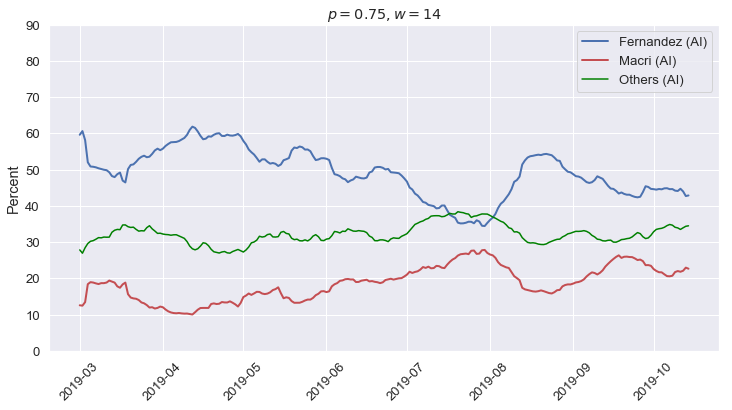

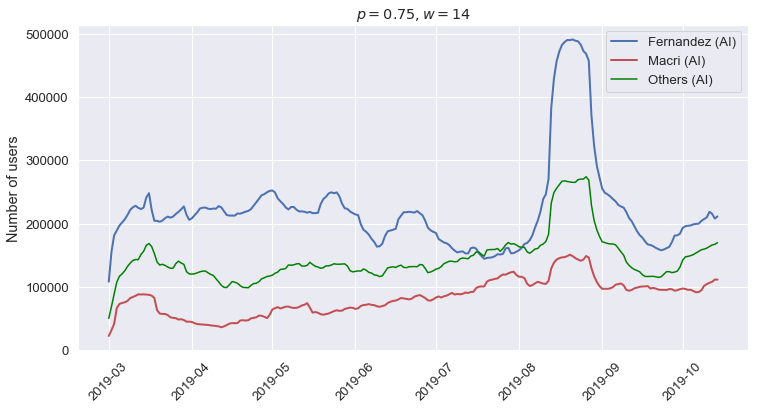

In [89]:
plot_ts("predicted-supporters-.75-14.csv", title="$p=0.75, w=14$")

                I       K       M      U         Kp         Mp         Up
dt                                                                       
2019-03-01  27596  118897   27372   7929  65.402048  15.056603  19.541349
2019-03-02  35678  169678   38676  11892  66.300152  15.112299  18.587549
2019-03-03  43650  200094   53512  15118  64.055907  17.130747  18.813346
2019-03-04  50980  213120   79237  21012  58.493368  21.747555  19.759077
2019-03-05  55866  223101   86221  22481  57.549353  22.240881  20.209767
2019-03-06  58121  228547   88132  23051  57.445375  22.152012  20.402613
2019-03-07  60520  235053   89459  23733  57.503211  21.885191  20.611598
2019-03-08  65404  242535   91874  24826  57.115573  21.635789  21.248637
2019-03-09  68608  250528   96399  26533  56.671824  21.806374  21.521802
2019-03-10  71152  254912   98820  27303  56.373138  21.853791  21.773072
2019-03-11  71741  257317  101071  27792  56.192444  22.071711  21.735845
2019-03-12  71128  254423  103089  280

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


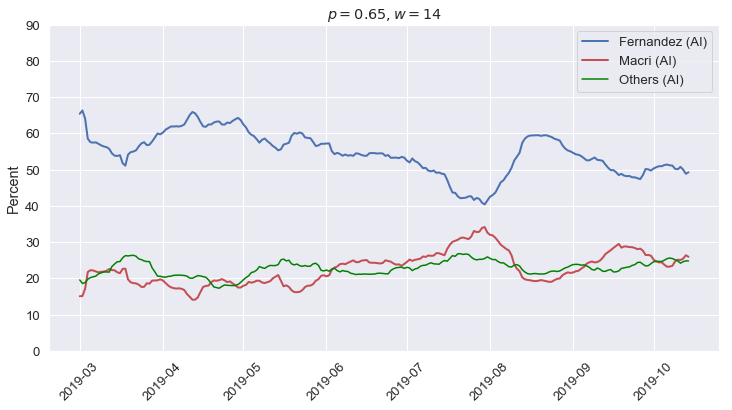

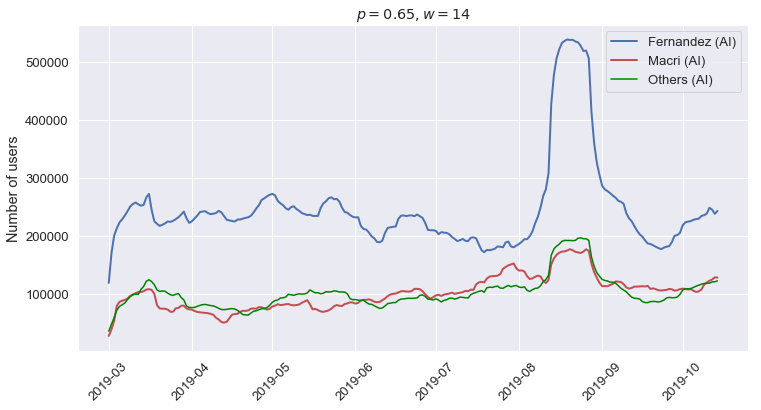

In [90]:
plot_ts("predicted-supporters-.68-14.csv", title="$p=0.65, w=14$")

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


                 I        K       M       U         Kp         Mp         Up
dt                                                                          
2019-03-01   19830   105975   24909    7659  66.914815  15.728060  17.357125
2019-03-02   16234    87565   22844    6598  65.719261  17.144873  17.135867
2019-03-03   27302   129773   41022   10834  62.112851  19.634233  18.252916
2019-03-04   36408   147744   72924   17103  53.885965  26.597223  19.516812
2019-03-05   42252   160581   80886   18776  53.085506  26.739616  20.174879
2019-03-06   44995   168098   83034   19575  53.245782  26.301385  20.452832
2019-03-07   48033   176789   84528   20424  53.609138  25.632100  20.758762
2019-03-08   53571   187204   86888   21782  53.571807  24.864571  21.563622
2019-03-09   57153   197760   91688   23520  53.431175  24.772439  21.796386
2019-03-10   59931   203507   94396   24390  53.242863  24.696513  22.060624
2019-03-11   60990   207774   97249   24964  53.142256  24.873330  21.984413

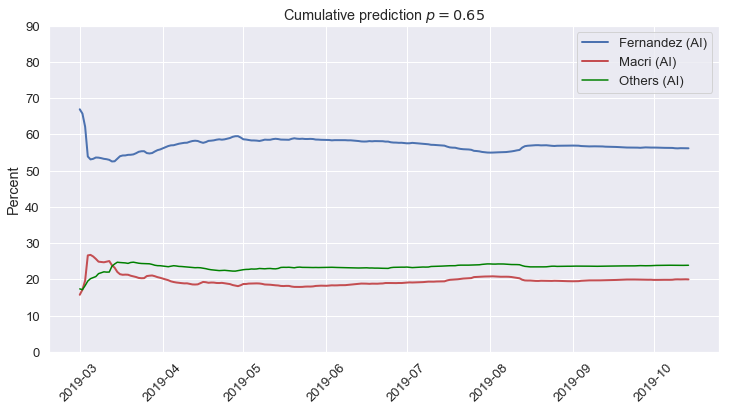

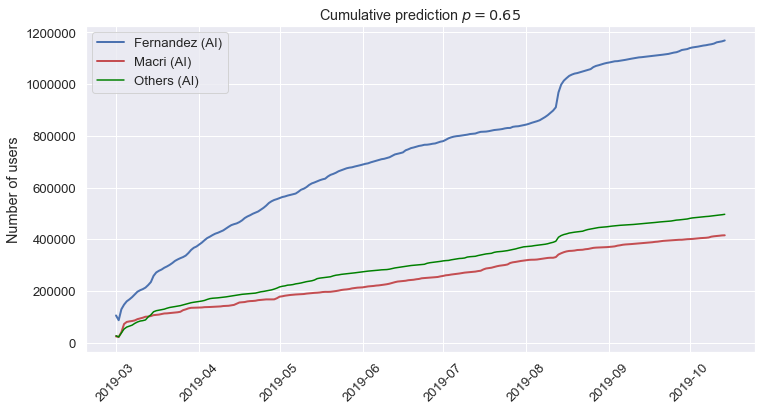

In [91]:
plot_ts("predicted-cul-supporters-.68-14.csv", title="Cumulative prediction $p=0.65$")

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


                 I        K       M       U         Kp         Mp         Up
dt                                                                          
2019-03-01    9046   111379   28627    9321  70.327013  18.075682  11.597305
2019-03-02    7199    92523   25552    7967  69.440337  19.177280  11.382382
2019-03-03   12253   135684   47574   13420  64.942014  22.770197  12.287789
2019-03-04   14540   153276   85288   21075  55.903625  31.106686  12.989689
2019-03-05   15739   166402   96939   23415  55.009835  32.046480  12.943685
2019-03-06   17142   174231   99968   24361  55.188437  31.665305  13.146258
2019-03-07   18985   182994  102362   25433  55.490730  31.040046  13.469224
2019-03-08   22972   194504  105074   26895  55.660834  30.068823  14.270343
2019-03-09   25294   206061  109957   28809  55.673955  29.708393  14.617652
2019-03-10   27854   212001  112587   29782  55.465120  29.455764  15.079116
2019-03-11   28507   216489  115613   30368  55.371288  29.570282  15.058431

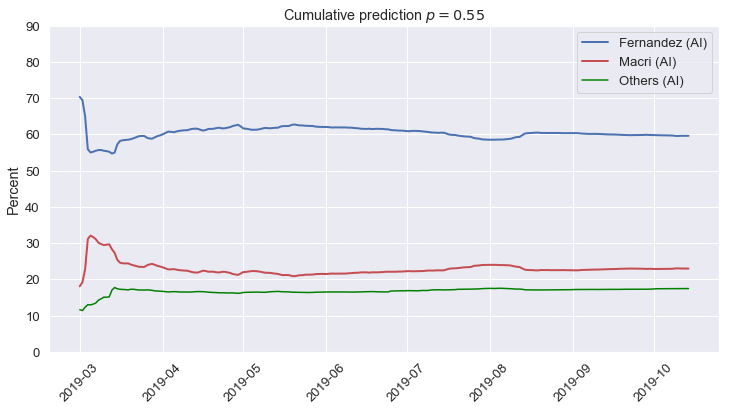

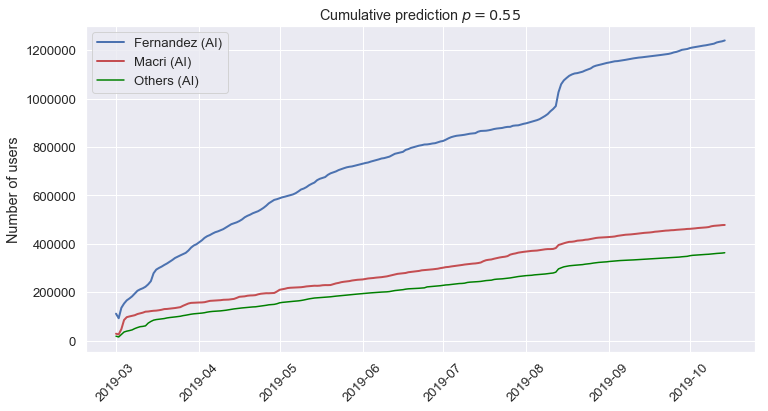

In [92]:
plot_ts("predicted-cul-supporters-.55-14.csv", title="Cumulative prediction $p=0.55$")

                I       K       M      U        Kp        Mp
Unnamed: 0                                                  
2019-06-30      0       0       0      0       NaN       NaN
2019-07-01      2      64     593      8  0.097412  0.902588
2019-07-02    887   38028   29691   4530  0.561556  0.438444
2019-07-03   1485   62910   52255   8127  0.546260  0.453740
2019-07-04   2130   83612   68237  11487  0.550626  0.449374
2019-07-05   3550   95654   78684  14281  0.548670  0.451330
2019-07-06   5228  105359   89901  16618  0.539583  0.460417
2019-07-07   6535  111564   99030  18320  0.529759  0.470241
2019-07-08   6844  118060  105469  19551  0.528164  0.471836
2019-07-09   7807  127050  113052  20718  0.529150  0.470850
2019-07-10  12257  123287  113195  20258  0.521338  0.478662
2019-07-11  13669  119643  108090  19677  0.525365  0.474635
2019-07-12  13647  110721  103849  18573  0.516013  0.483987
2019-07-13  13311  107885  101031  17371  0.516404  0.483596
2019-07-14  12882  12313

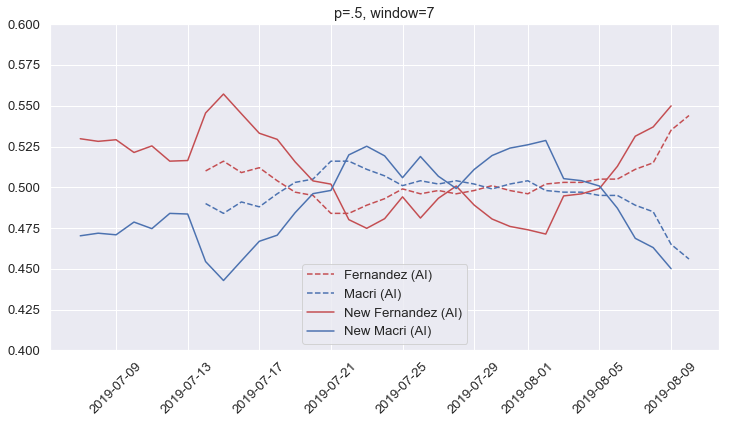

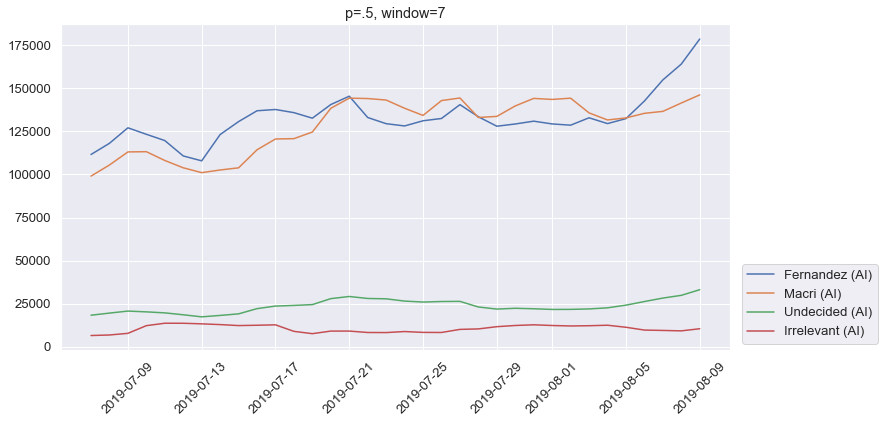

                I       K       M      U        Kp        Mp
Unnamed: 0                                                  
2019-06-30      0       0       0      0       NaN       NaN
2019-07-01      2      64     593      8  0.097412  0.902588
2019-07-02    887   38028   29691   4530  0.561556  0.438444
2019-07-03   1485   62910   52255   8127  0.546260  0.453740
2019-07-04   2130   83612   68237  11487  0.550626  0.449374
2019-07-05   3550   95654   78684  14281  0.548670  0.451330
2019-07-06   5228  105359   89901  16618  0.539583  0.460417
2019-07-07   6535  111564   99030  18320  0.529759  0.470241
2019-07-08   6844  118060  105469  19551  0.528164  0.471836
2019-07-09   7807  127028  113132  20721  0.528931  0.471069
2019-07-10  12675  138121  120691  22306  0.533673  0.466327
2019-07-11  14448  148091  126330  23861  0.539649  0.460351
2019-07-12  14923  153602  131529  24801  0.538707  0.461293
2019-07-13  15440  158786  134773  25521  0.540900  0.459100
2019-07-14  16304  17851

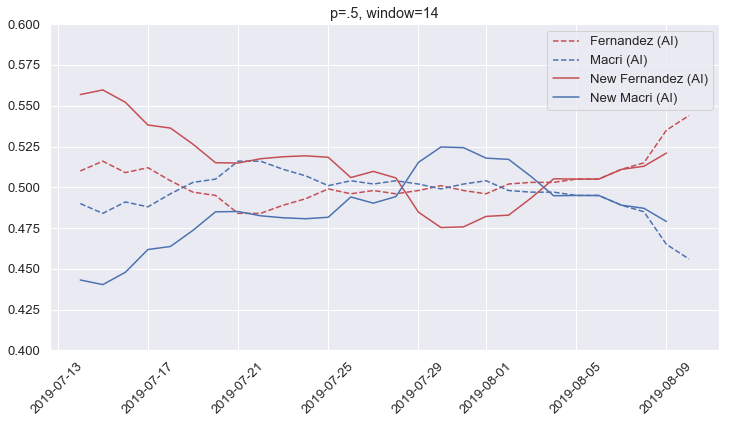

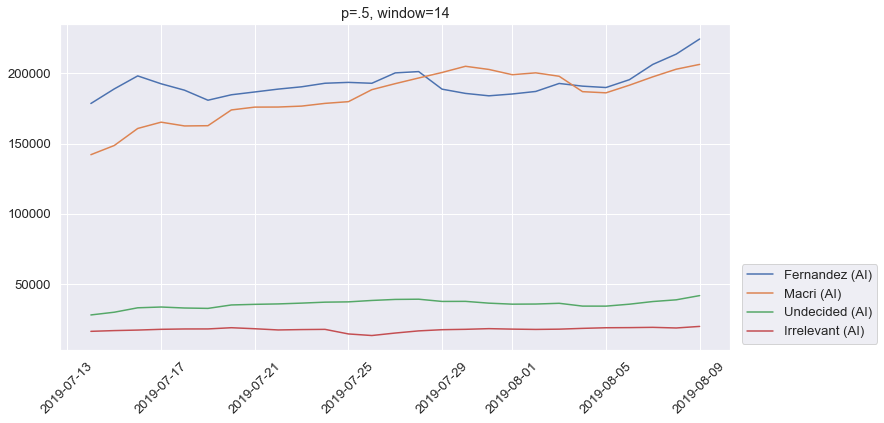

                 I       K       M      U        Kp        Mp
Unnamed: 0                                                   
2019-06-30       0       0       0      0       NaN       NaN
2019-07-01     112      27     527      1  0.048736  0.951264
2019-07-02   16495   31076   22780   2785  0.577020  0.422980
2019-07-03   30866   52508   36596   4807  0.589289  0.410711
2019-07-04   46309   65334   47074   6749  0.581222  0.418778
2019-07-05   54958   72953   56283   7975  0.564494  0.435506
2019-07-06   62799   79573   65589   9145  0.548167  0.451833
2019-07-07   69410   84472   71311  10256  0.542241  0.457759
2019-07-08   73205   89259   76648  10812  0.538006  0.461994
2019-07-09   78842   95427   82966  11392  0.534926  0.465074
2019-07-10   89387   86726   81608  11276  0.515202  0.484798
2019-07-11   89668   79295   81108  11008  0.494349  0.505651
2019-07-12   81499   74050   80746  10495  0.478372  0.521628
2019-07-13   78816   72946   77706  10130  0.484202  0.515798
2019-07-

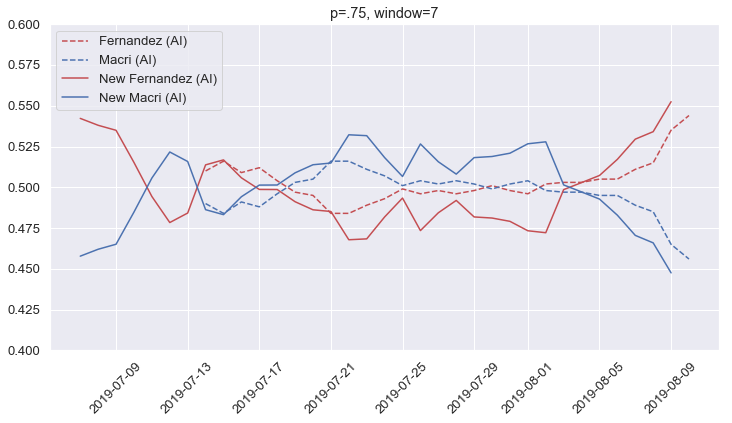

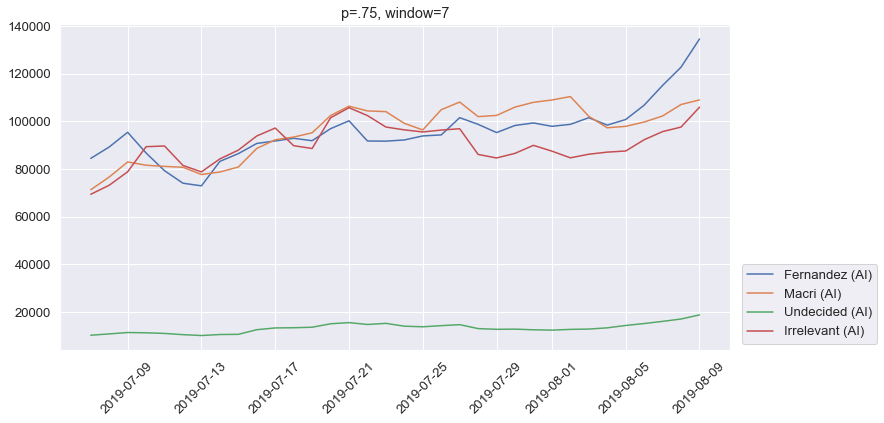

                 I       K       M      U        Kp        Mp
Unnamed: 0                                                   
2019-06-30       0       0       0      0       NaN       NaN
2019-07-01     112      27     527      1  0.048736  0.951264
2019-07-02   16495   31076   22780   2785  0.577020  0.422980
2019-07-03   30866   52508   36596   4807  0.589289  0.410711
2019-07-04   46309   65334   47074   6749  0.581222  0.418778
2019-07-05   54958   72953   56283   7975  0.564494  0.435506
2019-07-06   62799   79573   65589   9145  0.548167  0.451833
2019-07-07   69410   84472   71311  10256  0.542241  0.457759
2019-07-08   73205   89259   76648  10812  0.538006  0.461994
2019-07-09   78842   95410   83043  11393  0.534651  0.465349
2019-07-10   92443  101302   87594  12454  0.536285  0.463715
2019-07-11   99720  107681   92008  13321  0.539244  0.460756
2019-07-12  102343  111544   96962  14006  0.534968  0.465032
2019-07-13  104831  115748   99410  14531  0.537967  0.462033
2019-07-

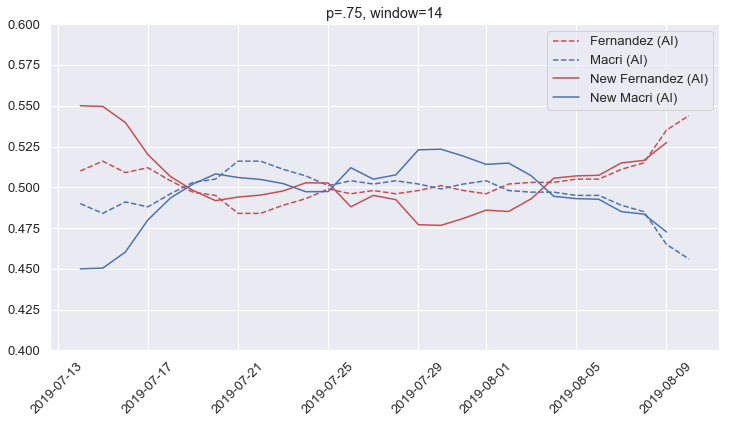

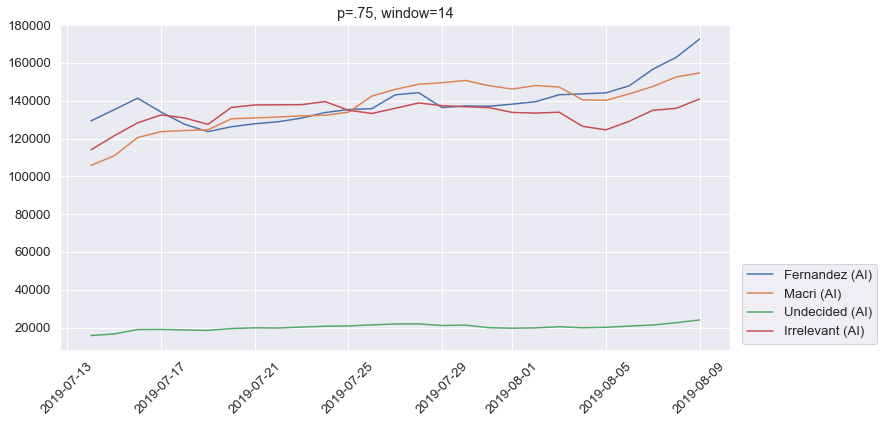

In [154]:
plot_ts(f"2019-08-08/0708-supporters_.5_7.csv", title=f"p=.5, window=7", win=7)
plot_ts(f"2019-08-08/0708-supporters_.5_14.csv", title=f"p=.5, window=14", win=14)
plot_ts(f"2019-08-08/0708-supporters_.75_7.csv", title=f"p=.75, window=7", win=7)
plot_ts(f"2019-08-08/0708-supporters_.75_14.csv", title=f"p=.75, window=14", win=14)

In [173]:
dt_rst.to_csv("data/for_fitting.csv")

In [47]:
d = pd.read_csv("data/support-20190625.csv").set_index("Unnamed: 0")
d.index = pd.to_datetime(d.index)
d

,K,M,U
Unnamed: 0,,,
2019-06-01,0,0,0
2019-06-02,50925,35022,7575
2019-06-03,99079,63686,14883
2019-06-04,145894,95056,22680
2019-06-05,184223,113813,28244
2019-06-06,219006,131452,33394
2019-06-07,253850,144131,37560
2019-06-08,280327,157483,41018
2019-06-09,294770,168075,43771


## Without PASO

In [110]:
d = pd.read_csv("data/support-moving-PASO-0613.csv").set_index("dt")

In [111]:
d.index = pd.to_datetime(d.index)

In [112]:
d

,K,M,U
dt,,,
2019-06-07,118815,166690,150036
2019-06-08,133673,180696,164459
2019-06-09,140108,192677,173831
2019-06-10,141900,194019,175692
2019-06-11,145787,194394,179232
2019-06-12,151443,195518,187451
2019-06-13,155058,204624,197407


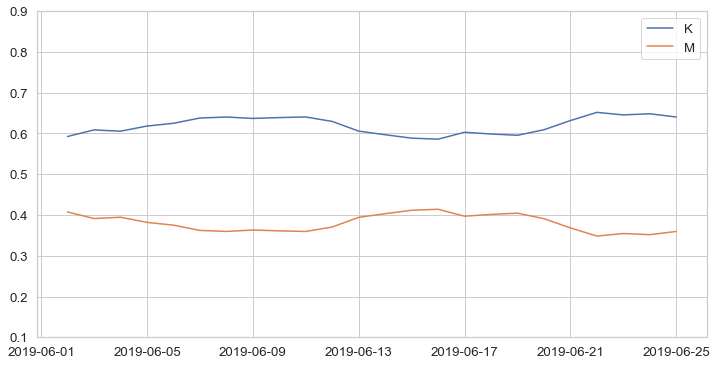

In [48]:
_sum = d["K"] + d["M"]
d["K"] = d["K"] / _sum
d["M"] = d["M"] / _sum

plt.figure(figsize=(12, 6))
plt.plot_date(d.index, d["K"], "-", label="K")
plt.plot_date(d.index, d["M"], "-", label="M")
plt.ylim(0.1, 0.9)
plt.legend()

## Crawler LOG

In [ ]:
all_words = ['Alberto AND Fernandez',
 'Alfonsin',
 'Alternativa AND Federal',
 'Bregman',
 'CFK',
 'CFK OR CFKArgentina',
 'CFKArgentina',
 'Cambiemos',
 'Capitanich',
 'Capitanich OR Lousteau OR Donda OR Justicialista OR Bregman OR Pichetto',
 'Consenso AND 19',
 'Cristina',
 'Cristina OR Kirchner OR Macri OR elecciones OR CFK OR CFKArgentina',
 'Donda',
 'Frente AND Izquierda',
 'Justicialista',
 'Kirchner',
 'Kirchner OR elecciones OR CFK OR CFKArgentina',
 'Lavagna',
 'Lousteau',
#  'MAS',
 'Macri',
 'Massa',
 'Moreno',
 'Movimiento AND Socialismo',
 'PASO',
 'PJ',
#  'PRO',
 'Partido AND Justicialista',
 'Peron',
 'Peronista',
 'Pichetto',
 'Propuesta AND Republicana',
 'Rossi',
 'Scioli',
 'Sola',
 'UCR',
 'Union AND Civic AND Radical',
 'Union AND Civica AND Radical',
 'Urtubey',
 'Vidal',
 'elecciones',
 'elecciones OR CFK OR CFKArgentina',
 'kirchnerismo',
 'macrismo',
 'mauriciomacri',
 'mauriciomacri OR PASO OR macrismo OR kirchnerismo OR peronismo',
 'mauriciomacri OR macrismo OR kirchnerismo OR peronismo',
 'peronismo']

In [43]:
from pathlib import Path
from collections import defaultdict

src = "/home/alex/kayzhou/tweets-collection-Argentina-election/log"

# all_words = set()

def plot_log(word):
    data = defaultdict(int)
    # word = "Macri"

    for in_name in Path(src).rglob('*.txt'):
        for line in open(in_name):
            w = line.strip().split("\t")
            if w[0] == 'Capitanich OR Lousteau OR Donda OR Justicialista OR Bregman  OR Pichetto':
                w[0] = 'Capitanich OR Lousteau OR Donda OR Justicialista OR Bregman OR Pichetto',
            if w[0] == word:
                dt = pendulum.parse(w[1][:10])
                num = int(w[2])
                data[dt] += num

    data = sorted(data.items(), key=lambda d: d[0])
    
    dts = [d[0] for d in data]
    nums = [d[1] for d in data]

    sns.set(style="darkgrid", font_scale=1.3)
    plt.figure(figsize=(12, 6))
    plt.plot_date(dts, nums, '-', label=f"Query: {word}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f"web/static/query_log/{word}.png", bbox_inches='tight')
    plt.close()

In [ ]:
for word in all_words:
    plot_log(word)

@USER features

In [39]:
from collections import Counter

cnt = Counter()

for line in open("disk/data/2019-07-06/tokens.txt"):
    w = line.strip().split("\t")
    w = w[1].split()
    for _w in w:
        if _w.startswith("@"):
            cnt[_w] += 1

In [ ]:
cnt.most_common(100)

In [110]:
d_p1 = pd.read_csv("web/data/2019-06/p8.csv").set_index("dt").tail(1)[["Fernandez (AI)"]]

In [116]:
d_p1 = d_p1[["Fernandez (AI)"]]

In [121]:
d_p1

,Fernandez (AI)
dt,
2019-08-09,0.512


In [122]:
d_p2 = pd.read_csv("web/data/undecided_users.csv").set_index("dt").tail(1)[["Fernandez"]]

In [123]:
d_p2

,Fernandez
dt,
2019-08-08,2.039


In [144]:
K = (0.512 * 100 + 2.039) * 0.9777
K

52.05177030000001

In [134]:
d_p3 = pd.read_csv("web/data/undecided_users.csv").set_index("dt").tail(1)

In [135]:
d_p3

,Fernandez,Macri,New Undecided
dt,,,
2019-08-08,2.039,1.172014,3.68


In [151]:
M = 100 - K - 3.68
M

44.26822969999999

In [152]:
K / (K + M)

0.54040459198505